In [51]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import datasets
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import io
import seaborn as sns
import numpy as np
import pickle
import tensorflow

In [52]:
import pandas as pd
df = pd.read_csv("CovidDataset.csv")
print(df.head())

  Breathing Problem Fever Dry Cough Sore throat Running Nose Asthma  \
0               Yes   Yes       Yes         Yes          Yes     No   
1               Yes   Yes       Yes         Yes           No    Yes   
2               Yes   Yes       Yes         Yes          Yes    Yes   
3               Yes   Yes       Yes          No           No    Yes   
4               Yes   Yes       Yes         Yes          Yes     No   

  Chronic Lung Disease Headache Heart Disease Diabetes  ... Fatigue   \
0                   No       No            No      Yes  ...      Yes   
1                  Yes      Yes            No       No  ...      Yes   
2                  Yes      Yes            No      Yes  ...      Yes   
3                   No       No           Yes      Yes  ...       No   
4                  Yes      Yes           Yes      Yes  ...       No   

  Gastrointestinal  Abroad travel Contact with COVID Patient  \
0               Yes            No                        Yes   
1           

In [53]:
df=df.replace(to_replace='Yes', value=1)
df=df.replace(to_replace='No', value=0)
print(df.head())

   Breathing Problem  Fever  Dry Cough  Sore throat  Running Nose  Asthma  \
0                  1      1          1            1             1       0   
1                  1      1          1            1             0       1   
2                  1      1          1            1             1       1   
3                  1      1          1            0             0       1   
4                  1      1          1            1             1       0   

   Chronic Lung Disease  Headache  Heart Disease  Diabetes  ...  Fatigue   \
0                     0         0              0         1  ...         1   
1                     1         1              0         0  ...         1   
2                     1         1              0         1  ...         1   
3                     0         0              1         1  ...         0   
4                     1         1              1         1  ...         0   

   Gastrointestinal   Abroad travel  Contact with COVID Patient  \
0      

In [54]:
y=df['COVID-19']
x=df.drop(columns=['Running Nose', 'Asthma', 'Chronic Lung Disease', 'Headache',
       'Heart Disease', 'Diabetes', 'Hyper Tension', 'Fatigue ',
       'Gastrointestinal ', 'Visited Public Exposed Places',
       'Family working in Public Exposed Places', 'Wearing Masks',
       'Sanitization from Market','COVID-19'])
xtrain, xtest, ytrain, ytest = train_test_split( x, y, test_size = 0.30,random_state = 42,shuffle = True)


In [55]:
xtrain.shape

(3803, 7)

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam


In [57]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [58]:
model = Sequential()
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1))

In [59]:
model.compile(optimizer='adam',loss='mse')
model.fit(x=xtrain,y=ytrain.values,
          validation_data=(xtest,ytest.values),
          batch_size=128,epochs=400, callbacks=[early_stop])

Epoch 1/400
30/30 [==============================] - 1s 11ms/step - loss: 0.7915 - val_loss: 0.7007
Epoch 2/400
30/30 [==============================] - 0s 5ms/step - loss: 0.6693 - val_loss: 0.5411
Epoch 3/400
30/30 [==============================] - 0s 4ms/step - loss: 0.4807 - val_loss: 0.2674
Epoch 4/400
30/30 [==============================] - 0s 4ms/step - loss: 0.2065 - val_loss: 0.0854
Epoch 5/400
30/30 [==============================] - 0s 5ms/step - loss: 0.0807 - val_loss: 0.0819

In [60]:
losses = pd.DataFrame(model.history.history)


<AxesSubplot:>

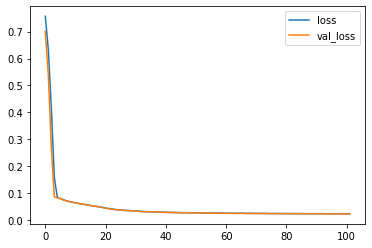

In [61]:
losses.plot()


In [62]:
BreathingProblem = 'Yes' #@param ["Yes", "No"]
Fever = 'No' #@param ["Yes", "No"]
DryCough = 'No' #@param ["Yes", "No"]
SoreThroat = 'Yes' #@param ["Yes", "No"]
AboradTravel = 'Yes' #@param ["Yes", "No"]
ContactwithCovid19Patient = 'Yes' #@param ["Yes", "No"]
AttendedLargeGathering =  'No' #@param ["Yes", "No"]

if(BreathingProblem=='Yes'):
  a = 1
else:
  a = 0
if(Fever=='Yes'):
  b = 1
else:
  b = 0
if(DryCough=='Yes'):
  c = 1
else:
  c = 0
if(SoreThroat=='Yes'):
  d = 1
else:
  d = 0
if(AboradTravel=='Yes'):
  e = 1
else:
  e = 0
if(ContactwithCovid19Patient=='Yes'):
  f = 1
else:
  f = 0
if(AttendedLargeGathering=='Yes'):
  g = 1
else:
  g = 0

data = {
    'Breathing Problem' : [a],
    'Fever' : [b],
    'Dry Cough' : [c],
    'Sore throat' : [d],
    'Abroad travel' : [e],
    'Contact with COVID Patient' : [f],
    'Attended Large Gathering' : [g]
}

In [65]:
testdata = pd.DataFrame.from_dict(data)
print("\n\n...................................\n\nYour COVID-19 prabability is",round(model.predict(testdata)[0][0]*100)," %\n\n...................................\n\n")



...................................

Your COVID-19 prabability is 95  %

...................................




In [66]:
model.save('checker_DL.h5')


